# imports

In [1]:
import sys
sys.path.append('U:\\neuro_cl\\')
import utils

In [2]:
from vr2p.gimbl.parse import parse_gimbl_log
from vr2p.gimbl.task import get_lap_info
from vr2p.gimbl.parse import parse_custom_msg
from vr2p.gimbl.extract import movement_speed
from vr2p.gimbl.transform import add_timestamp_values, add_ranged_timestamp_values

import json

from utils import behav
from utils import analysis
from utils import plotting
from utils import multisession_plotting_utils
from utils import multisession_utils

# look at 1 session

U:\neuro_cl\vr2p\gimbl\parse.py:225: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  path = path.groupby(["frame", "name", "path"]).first()
U:\neuro_cl\vr2p\gimbl\parse.py:359: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  settings["index"]= settings.groupby("name").cumcount()


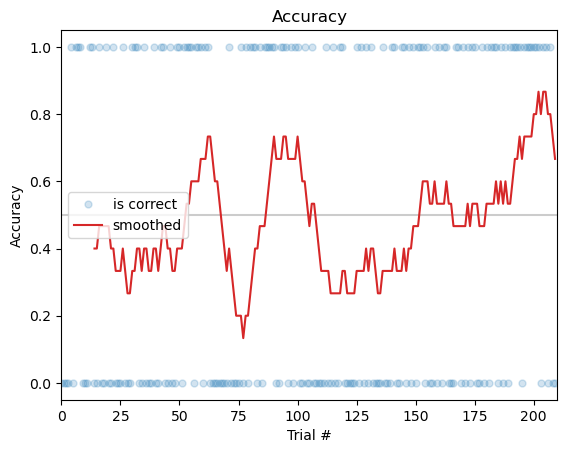

In [55]:
behavior_data_path = 'E:\\Unbiased\\GluA2\\Behavior data\\BM28\\Log BM28 2024-10-03 session 1.json'
log, vr = parse_gimbl_log(behavior_data_path, verbose=True)
vr = behav.preprocess_vr(log, vr)
plot_accuracy(vr.task, 15)

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
BLUE, ORANGE, GREEN, RED, PURPLE, BROWN, PINK, GRAY, YELLOW, LIGHTBLUE = (
    sns.color_palette(palette='tab10'))
def plot_accuracy(task_df, window_size=30, ax=None):
  """Plot accuracy over time."""
  smoothed_acc_key = f'is_correct_smooth{window_size}'
  ax = plt.gca() if ax is None else ax

  task_df['trial'] = task_df.index
  task_df['is_correct'] = np.array(
      task_df['lick_logged'] == task_df['data.isRewarding'], dtype=np.float32)
  task_df[smoothed_acc_key] = np.array(task_df['is_correct'].rolling(
      window_size).mean())

  n_trials = len(task_df)
  ax.plot([0, n_trials], [.5, .5], color='k', alpha=0.2)
  ax.plot(task_df['trial'], task_df['is_correct'], '.', label='is correct',
          alpha=0.2, markersize=10, color=BLUE)
  ax.plot(task_df['trial'], task_df[smoothed_acc_key], label='smoothed',
          color=RED)
  ax.set_xlim([0, n_trials])
  ax.set_xlabel('Trial #')
  ax.set_ylabel('Accuracy')
  ax.legend()
  ax.set_title('Accuracy')

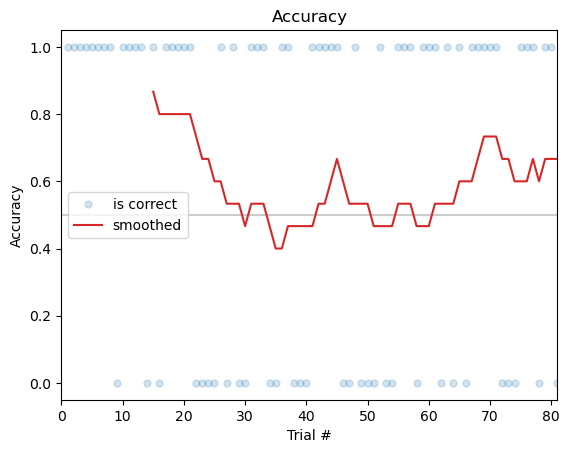

# pre proccess metadat and json files

In [3]:
from behavior import load_and_clean_mafe_sheet, load_and_clean_alyssa_sheet, pre_proccess
import os
import pickle


In [ ]:

MOUSE_DIR = "E:\\Unbiased\\GluA2\\Behavior data"
mice = [24,26,27,28,29,30]
pre_proccess(MOUSE_DIR, mice)

Starting mouse BM24.
E:\Unbiased\GluA2\Behavior data\BM24
  Processing E:\Unbiased\GluA2\Behavior data\BM24\Log BM24 2024-08-01 session 1.json...


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000130388F39D0>>
Traceback (most recent call last):
  File "c:\ProgramData\miniforge3\envs\pyants\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
U:\neuro_cl\vr2p\gimbl\parse.py:225: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  path = path.groupby(["frame", "name", "path"]).first()
U:\neuro_cl\vr2p\gimbl\parse.py:359: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  settings["index"]= settings

  Saved 1 of 20 (time elapsed = 13.614805936813354 sec)
  Processing E:\Unbiased\GluA2\Behavior data\BM24\Log BM24 2024-08-02 session 1.json...


In [4]:
BM24 = load_and_clean_mafe_sheet(r'E:\Unbiased\GluA2\Behavior data', 'BM24.csv')
BM26 = load_and_clean_mafe_sheet(r'E:\Unbiased\GluA2\Behavior data', 'BM26.csv')
BM27 = load_and_clean_alyssa_sheet(r'E:\Unbiased\GluA2\Behavior data','BM27')
BM28 = load_and_clean_alyssa_sheet(r'E:\Unbiased\GluA2\Behavior data','BM28')
BM29 = load_and_clean_alyssa_sheet(r'E:\Unbiased\GluA2\Behavior data','BM29')
BM30 = load_and_clean_alyssa_sheet(r'E:\Unbiased\GluA2\Behavior data','BM30')

In [6]:
MOUSE_DIR = "E:\\Unbiased\\GluA2\\Behavior data"
meta_dict = {
    'BM24': BM24,
    'BM26': BM26,
    'BM27': BM27,
    'BM28': BM28,
    'BM29': BM29,
    'BM30': BM30,
}

# Save the dictionary as a pickle file
with open(os.path.join(MOUSE_DIR, 'behavior_data.pkl'), 'wb') as f:
    pickle.dump(meta_dict, f)